<a href="https://colab.research.google.com/github/Amogh-D/Mental-Health-Evaluator/blob/main/Mental_Health_Evaluator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

All of the imports for the libraries we will use are below. This is mainly a tensorflow project so we mainly use tensorflow and tensorflow.keras libraries!
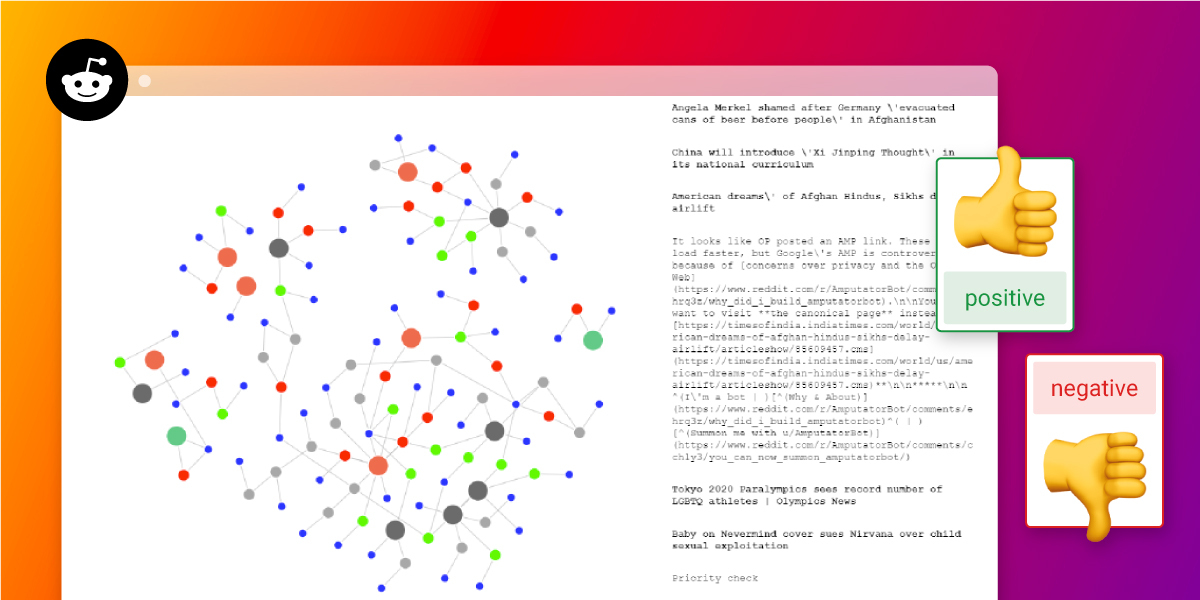

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from pprint import pprint
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
#I removed the labels from the data below, this data comes from https://www.kaggle.com/datasets/xavrig/reddit-dataset-rdepression-and-rsuicidewatch
data = pd.read_csv("reddit_depression_suicidewatch.csv")

In [ ]:
#In data.head we realize there are two labels. The first label is label which signifies the subreddit (ex: SuicideWatch, Depression)
#Our second label is text which shows the text of different reddit posts under a subreddit
data.head()

,text,label
0,I recently went through a breakup and she said...,depression
1,"I do not know how to navigate these feelings, ...",depression
2,"So I have been with my bf for 5 months , and h...",depression
3,I am so exhausted of this. Just when I think I...,SuicideWatch
4,I have been severly bullied since i was 5 till...,depression


In the code below we tokenize the sentences by splitting them into separate words and adding an index to every word (for example: depression = 1, etc.). Afterward we create sequences with our data, and with our sequences we create padded (more organized) sequences.

In [ ]:
#create token
tokenizer = Tokenizer(oov_token = "<OOV>")
tokenizer.fit_on_texts(data['text'])
total_words = len(tokenizer.word_index) + 1
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(data['text'])
padded = pad_sequences(sequences, padding="post", maxlen=500)

Print out everything below to check if we have the correct information!)

In [ ]:
print(padded)
print(sequences)
print(word_index)
print(total_words)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



We use sentimental analysis in order to analyze the pattern in words we have!

In [ ]:
""" def review_encoder(text):
  arr=[word_index[word] for word in text]
  return arr
"""

train_data,train_labels=data['text'],data['label']

#train_data=train_data.apply(lambda review:review.split())


#depression suicidewatch different x
def encode_sentiments(x):
  if x=='depression':
    return 1
  else:
    return 0

train_labels=train_labels.apply(encode_sentiments)

model = Sequential([
                    keras.layers.Embedding(10000,16,input_length=500),
                    keras.layers.GlobalAveragePooling1D(),
                    keras.layers.Dense(16,activation='relu'),
                    keras.layers.Dense(1,activation='sigmoid')
                  ])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(padded,train_labels,epochs=30,batch_size=512)

Epoch 1/30
40/40 [==============================] - 4s 6ms/step - loss: 0.6922 - accuracy: 0.5451
Epoch 2/30
40/40 [==============================] - 0s 6ms/step - loss: 0.6892 - accuracy: 0.5618
Epoch 3/30
40/40 [==============================] - 1s 18ms/step - loss: 0.6851 - accuracy: 0.5723
Epoch 4/30
40/40 [==============================] - 0s 5ms/step - loss: 0.6799 - accuracy: 0.5805
Epoch 5/30
40/40 [==============================] - 0s 5ms/step - loss: 0.6714 - accuracy: 0.6121
Epoch 6/30
40/40 [==============================] - 0s 5ms/step - loss: 0.6572 - accuracy: 0.6638
Epoch 7/30
40/40 [==============================] - 0s 5ms/step - loss: 0.6379 - accuracy: 0.6941
Epoch 8/30
40/40 [==============================] - 0s 5ms/step - loss: 0.6171 - accuracy: 0.7118
Epoch 9/30
40/40 [==============================] - 0s 5ms/step - loss: 0.5976 - accuracy: 0.7191
Epoch 10/30
40/40 [==============================] - 0s 5ms/step - loss: 0.5808 - accuracy: 0.7257
Epoch 11/30
40/40 